# SciPy Statistical Analysis Exercises

A series of exercises covering descriptive statistics, distributions, hypothesis testing, linear regression, ANOVA, and correlation using SciPy.

---
## Exercise 1: Basic Usage of SciPy

In [1]:
import scipy
print(f"SciPy version: {scipy.__version__}")

# scipy is organized into subpackages, the main ones we'll use:
# - scipy.stats: statistical functions, distributions, tests
# - scipy.optimize: curve fitting, minimization
# - scipy.linalg: linear algebra (extends numpy.linalg)

# quick look at what's available in scipy.stats
from scipy import stats
print(f"\nNumber of distributions in scipy.stats: {len(stats._continuous_distns._distn_names)}")
print(f"Some available distributions: {stats._continuous_distns._distn_names[:10]}")
print(f"\nSome available tests: ttest_ind, ttest_rel, mannwhitneyu, f_oneway, pearsonr, spearmanr, shapiro, ...")

SciPy version: 1.17.0

Number of distributions in scipy.stats: 109
Some available distributions: ['ksone', 'kstwo', 'kstwobign', 'norm', 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford']

Some available tests: ttest_ind, ttest_rel, mannwhitneyu, f_oneway, pearsonr, spearmanr, shapiro, ...


---
## Exercise 2: Descriptive Statistics

Calculate mean, median, variance, and standard deviation for the given dataset.

In [2]:
import numpy as np
from scipy import stats

data = [12, 15, 13, 12, 18, 20, 22, 21]

# using scipy.stats for descriptive statistics
description = stats.describe(data)

mean = np.mean(data)
median = np.median(data)
variance = np.var(data, ddof=1)       # sample variance (ddof=1)
std_dev = np.std(data, ddof=1)        # sample standard deviation
sem = stats.sem(data)                  # standard error of the mean
mode_result = stats.mode(data, keepdims=True)

print(f"Dataset: {data}")
print(f"Number of observations: {len(data)}")
print(f"")
print(f"Mean:                {mean:.4f}")
print(f"Median:              {median:.4f}")
print(f"Mode:                {mode_result.mode[0]} (count: {mode_result.count[0]})")
print(f"Variance (sample):   {variance:.4f}")
print(f"Std Dev (sample):    {std_dev:.4f}")
print(f"Std Error of Mean:   {sem:.4f}")
print(f"Min:                 {np.min(data)}")
print(f"Max:                 {np.max(data)}")
print(f"Range:               {np.max(data) - np.min(data)}")
print(f"Skewness:            {stats.skew(data):.4f}")
print(f"Kurtosis:            {stats.kurtosis(data):.4f}")

Dataset: [12, 15, 13, 12, 18, 20, 22, 21]
Number of observations: 8

Mean:                16.6250
Median:              16.5000
Mode:                12 (count: 2)
Variance (sample):   17.1250
Std Dev (sample):    4.1382
Std Error of Mean:   1.4631
Min:                 12
Max:                 22
Range:               10
Skewness:            0.0653
Kurtosis:            -1.6477


---
## Exercise 3: Understanding Distributions

Generate and plot a normal distribution with mean = 50 and std = 10.

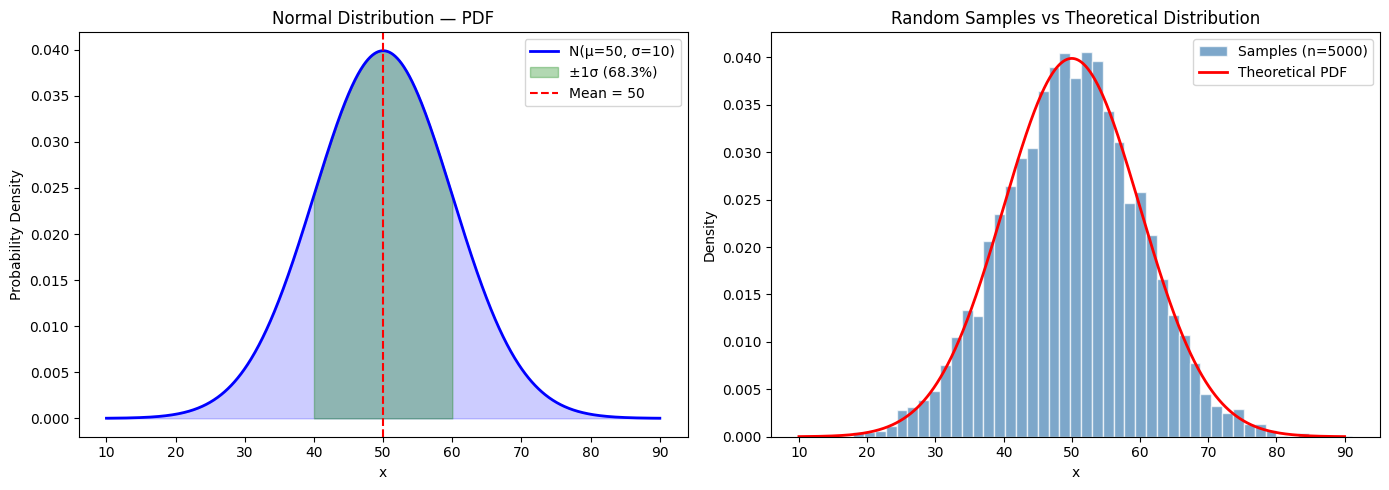

P(X < 50) = 0.5000
P(40 < X < 60) = 0.6827
95th percentile = 66.45


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# parameters
mu = 50     # mean
sigma = 10  # standard deviation

# generate x values and compute the PDF (probability density function)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, loc=mu, scale=sigma)

# also generate random samples from this distribution
samples = norm.rvs(loc=mu, scale=sigma, size=5000)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# left: theoretical PDF
axes[0].plot(x, pdf, "b-", linewidth=2, label=f"N(μ={mu}, σ={sigma})")
axes[0].fill_between(x, pdf, alpha=0.2, color="blue")
# shade the 1-sigma region
x_1sig = np.linspace(mu - sigma, mu + sigma, 300)
axes[0].fill_between(x_1sig, norm.pdf(x_1sig, mu, sigma), alpha=0.3, color="green", label="±1σ (68.3%)")
axes[0].axvline(mu, color="red", linestyle="--", label=f"Mean = {mu}")
axes[0].set_xlabel("x")
axes[0].set_ylabel("Probability Density")
axes[0].set_title("Normal Distribution — PDF")
axes[0].legend()

# right: histogram of random samples vs theoretical
axes[1].hist(samples, bins=50, density=True, color="steelblue", edgecolor="white", alpha=0.7, label="Samples (n=5000)")
axes[1].plot(x, pdf, "r-", linewidth=2, label="Theoretical PDF")
axes[1].set_xlabel("x")
axes[1].set_ylabel("Density")
axes[1].set_title("Random Samples vs Theoretical Distribution")
axes[1].legend()

plt.tight_layout()
plt.show()

# some useful properties
print(f"P(X < 50) = {norm.cdf(50, mu, sigma):.4f}")    # CDF at the mean
print(f"P(40 < X < 60) = {norm.cdf(60, mu, sigma) - norm.cdf(40, mu, sigma):.4f}")  # within 1 sigma
print(f"95th percentile = {norm.ppf(0.95, mu, sigma):.2f}")  # inverse CDF

---
## Exercise 4: T-Test Application

Perform an independent samples T-test on two groups of randomly generated data.

- $H_0$: The two groups have the same mean ($\mu_1 = \mu_2$)
- $H_1$: The two groups have different means ($\mu_1 \neq \mu_2$)

In [4]:
np.random.seed(42)
data1 = np.random.normal(50, 10, 100)  # group 1: mean=50, std=10
data2 = np.random.normal(60, 10, 100)  # group 2: mean=60, std=10

print(f"Group 1: n={len(data1)}, mean={np.mean(data1):.2f}, std={np.std(data1, ddof=1):.2f}")
print(f"Group 2: n={len(data2)}, mean={np.mean(data2):.2f}, std={np.std(data2, ddof=1):.2f}")

# independent samples t-test (two-sided)
t_stat, p_value = stats.ttest_ind(data1, data2)
print(f"\nIndependent T-test:")
print(f"  t-statistic = {t_stat:.4f}")
print(f"  p-value     = {p_value:.2e}")
print(f"  => {'REJECT H0' if p_value < 0.05 else 'Fail to reject H0'} at alpha = 0.05")

if p_value < 0.05:
    print(f"\nConclusion: The means of the two groups are significantly different.")
    print(f"  This makes sense — we generated them with means of 50 and 60.")

Group 1: n=100, mean=48.96, std=9.08
Group 2: n=100, mean=60.22, std=9.54

Independent T-test:
  t-statistic = -8.5515
  p-value     = 3.29e-15
  => REJECT H0 at alpha = 0.05

Conclusion: The means of the two groups are significantly different.
  This makes sense — we generated them with means of 50 and 60.


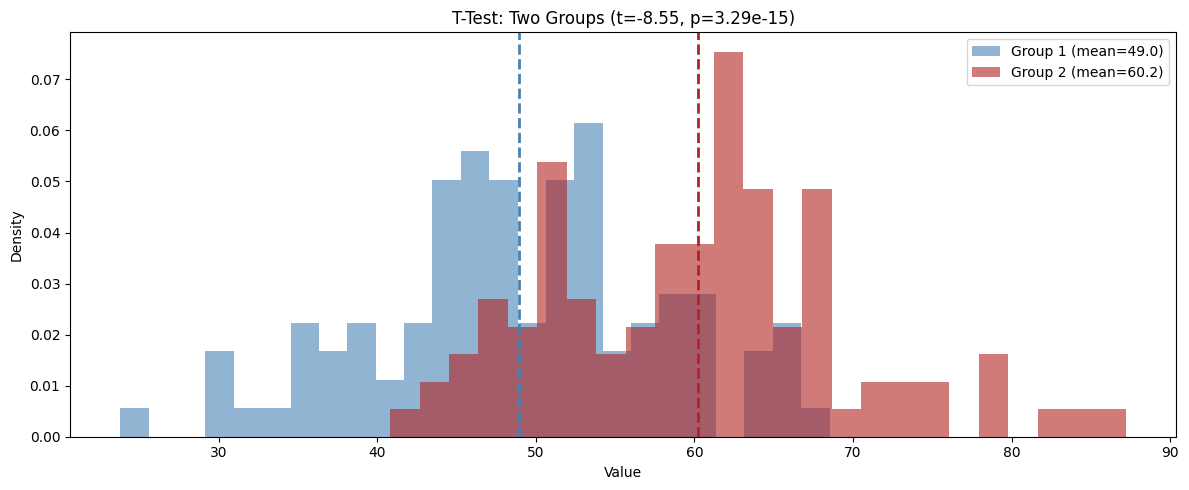

In [5]:
# visualize the two distributions
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(data1, bins=25, alpha=0.6, color="steelblue", label=f"Group 1 (mean={np.mean(data1):.1f})", density=True)
ax.hist(data2, bins=25, alpha=0.6, color="firebrick", label=f"Group 2 (mean={np.mean(data2):.1f})", density=True)
ax.axvline(np.mean(data1), color="steelblue", linestyle="--", linewidth=2)
ax.axvline(np.mean(data2), color="firebrick", linestyle="--", linewidth=2)
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.set_title(f"T-Test: Two Groups (t={t_stat:.2f}, p={p_value:.2e})")
ax.legend()
plt.tight_layout()
plt.show()

---
## Exercise 5: Linear Regression Analysis

Use linear regression to model the relationship between house size and price, then predict the price for a 90 m² house.

In [6]:
house_sizes = np.array([50, 70, 80, 100, 120])          # square meters
house_prices = np.array([150000, 200000, 210000, 250000, 280000])  # currency units

# perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(house_sizes, house_prices)

print("Linear Regression Results:")
print(f"  Slope (β₁):     {slope:.2f} currency/m²")
print(f"  Intercept (β₀): {intercept:.2f}")
print(f"  R² value:        {r_value**2:.4f}")
print(f"  p-value:         {p_value:.4e}")
print(f"  Std error:       {std_err:.2f}")

# predict price for a 90 m² house
predicted_90 = slope * 90 + intercept
print(f"\nPrediction for 90 m² house: {predicted_90:,.0f} currency units")

# interpretation
print(f"\nInterpretation of the slope:")
print(f"  For each additional square meter, the house price increases by ~{slope:,.0f} currency units.")
print(f"  The R² of {r_value**2:.4f} means that {r_value**2*100:.1f}% of the price variation")
print(f"  is explained by the house size — a very strong linear relationship.")

Linear Regression Results:
  Slope (β₁):     1828.77 currency/m²
  Intercept (β₀): 64383.56
  R² value:        0.9884
  p-value:         5.3053e-04
  Std error:       114.27

Prediction for 90 m² house: 228,973 currency units

Interpretation of the slope:
  For each additional square meter, the house price increases by ~1,829 currency units.
  The R² of 0.9884 means that 98.8% of the price variation
  is explained by the house size — a very strong linear relationship.


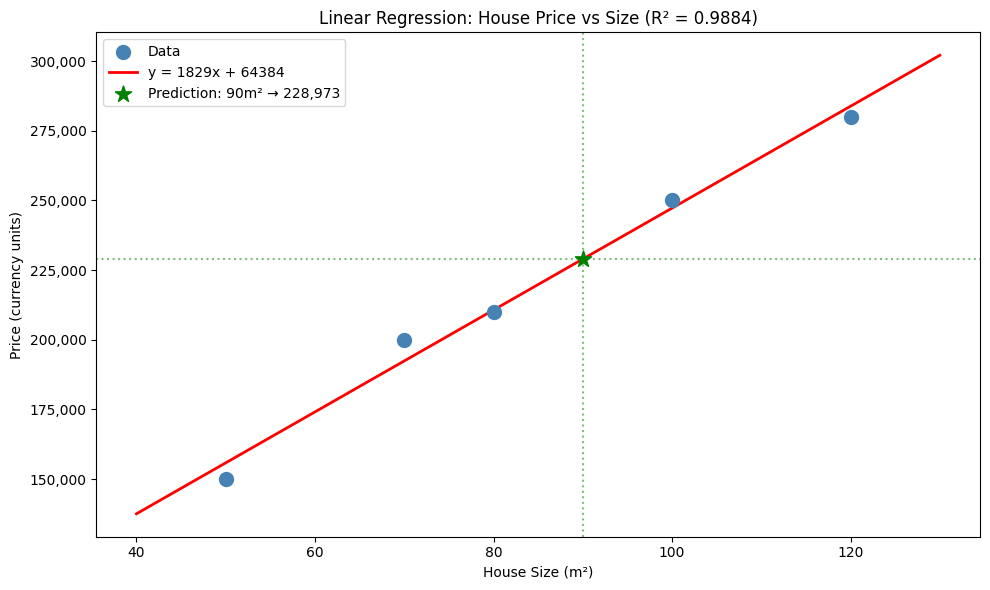

In [7]:
# plot the regression
fig, ax = plt.subplots(figsize=(10, 6))

# data points
ax.scatter(house_sizes, house_prices, color="steelblue", s=100, zorder=5, label="Data")

# regression line
x_line = np.linspace(40, 130, 100)
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, "r-", linewidth=2, label=f"y = {slope:.0f}x + {intercept:.0f}")

# prediction for 90 m²
ax.scatter(90, predicted_90, color="green", s=150, marker="*", zorder=6, label=f"Prediction: 90m² → {predicted_90:,.0f}")
ax.axvline(90, color="green", linestyle=":", alpha=0.5)
ax.axhline(predicted_90, color="green", linestyle=":", alpha=0.5)

ax.set_xlabel("House Size (m²)")
ax.set_ylabel("Price (currency units)")
ax.set_title(f"Linear Regression: House Price vs Size (R² = {r_value**2:.4f})")
ax.legend()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.tight_layout()
plt.show()

---
## Exercise 6: Understanding ANOVA

Test whether three different fertilizers produce significantly different plant growth.

**One-way ANOVA hypotheses:**
- $H_0$: All three fertilizers produce the same mean growth ($\mu_1 = \mu_2 = \mu_3$)
- $H_1$: At least one fertilizer produces a different mean growth

In [8]:
fertilizer_1 = [5, 6, 7, 6, 5]
fertilizer_2 = [7, 8, 7, 9, 8]
fertilizer_3 = [4, 5, 4, 3, 4]

# descriptive stats for each group
for i, fert in enumerate([fertilizer_1, fertilizer_2, fertilizer_3], 1):
    print(f"Fertilizer {i}: mean={np.mean(fert):.2f}, std={np.std(fert, ddof=1):.2f}")

# one-way ANOVA
f_stat, p_value = stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)

print(f"\nOne-Way ANOVA Results:")
print(f"  F-value = {f_stat:.4f}")
print(f"  P-value = {p_value:.4e}")
print(f"  => {'REJECT H0' if p_value < 0.05 else 'Fail to reject H0'} at alpha = 0.05")

if p_value < 0.05:
    print(f"\nConclusion: The fertilizers have significantly different effects on plant growth.")
    print(f"  Fertilizer 2 (mean={np.mean(fertilizer_2):.1f}) appears to be the most effective,")
    print(f"  while Fertilizer 3 (mean={np.mean(fertilizer_3):.1f}) is the least effective.")

print(f"\nWhat if p-value > 0.05?")
print(f"  We would fail to reject H0, meaning we have no statistical evidence")
print(f"  that the fertilizers produce different growth. The observed differences")
print(f"  could just be due to random variation.")

Fertilizer 1: mean=5.80, std=0.84
Fertilizer 2: mean=7.80, std=0.84
Fertilizer 3: mean=4.00, std=0.71

One-Way ANOVA Results:
  F-value = 28.5263
  P-value = 2.7543e-05
  => REJECT H0 at alpha = 0.05

Conclusion: The fertilizers have significantly different effects on plant growth.
  Fertilizer 2 (mean=7.8) appears to be the most effective,
  while Fertilizer 3 (mean=4.0) is the least effective.

What if p-value > 0.05?
  We would fail to reject H0, meaning we have no statistical evidence
  that the fertilizers produce different growth. The observed differences
  could just be due to random variation.


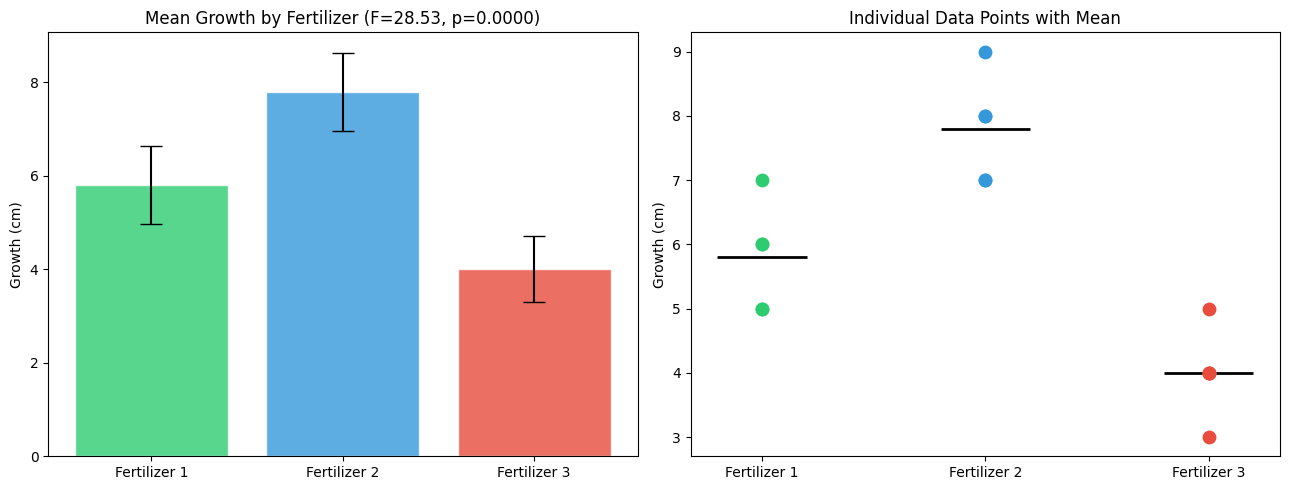

In [9]:
# visualize
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# bar plot with error bars
means = [np.mean(f) for f in [fertilizer_1, fertilizer_2, fertilizer_3]]
stds = [np.std(f, ddof=1) for f in [fertilizer_1, fertilizer_2, fertilizer_3]]
x_pos = [0, 1, 2]
colors = ["#2ecc71", "#3498db", "#e74c3c"]

axes[0].bar(x_pos, means, yerr=stds, capsize=8, color=colors, edgecolor="white", alpha=0.8)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(["Fertilizer 1", "Fertilizer 2", "Fertilizer 3"])
axes[0].set_ylabel("Growth (cm)")
axes[0].set_title(f"Mean Growth by Fertilizer (F={f_stat:.2f}, p={p_value:.4f})")

# individual data points
all_data = [fertilizer_1, fertilizer_2, fertilizer_3]
for i, (fert, c) in enumerate(zip(all_data, colors)):
    axes[1].scatter([i]*len(fert), fert, color=c, s=80, zorder=5)
    axes[1].hlines(np.mean(fert), i-0.2, i+0.2, colors="black", linewidths=2)

axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(["Fertilizer 1", "Fertilizer 2", "Fertilizer 3"])
axes[1].set_ylabel("Growth (cm)")
axes[1].set_title("Individual Data Points with Mean")

plt.tight_layout()
plt.show()

---
## Exercise 7: Probability Distributions (Binomial)

Work with a binomial distribution: calculate the probability of getting exactly 5 heads in 10 fair coin flips.

The binomial distribution models the number of successes in $n$ independent trials, each with probability $p$.

In [10]:
from scipy.stats import binom

n = 10    # number of trials (coin flips)
p = 0.5   # probability of success (heads)

# P(X = 5) — exactly 5 heads
p_exactly_5 = binom.pmf(5, n, p)
print(f"P(X = 5) = {p_exactly_5:.4f}  ({p_exactly_5*100:.2f}%)")

# some other useful probabilities
p_at_least_5 = 1 - binom.cdf(4, n, p)
p_at_most_3 = binom.cdf(3, n, p)
p_between_4_and_7 = binom.cdf(7, n, p) - binom.cdf(3, n, p)

print(f"P(X >= 5) = {p_at_least_5:.4f}")
print(f"P(X <= 3) = {p_at_most_3:.4f}")
print(f"P(4 <= X <= 7) = {p_between_4_and_7:.4f}")

# expected value and variance
print(f"\nExpected value E(X) = n*p = {n*p:.1f}")
print(f"Variance Var(X) = n*p*(1-p) = {n*p*(1-p):.2f}")
print(f"Std Dev = {np.sqrt(n*p*(1-p)):.2f}")

P(X = 5) = 0.2461  (24.61%)
P(X >= 5) = 0.6230
P(X <= 3) = 0.1719
P(4 <= X <= 7) = 0.7734

Expected value E(X) = n*p = 5.0
Variance Var(X) = n*p*(1-p) = 2.50
Std Dev = 1.58


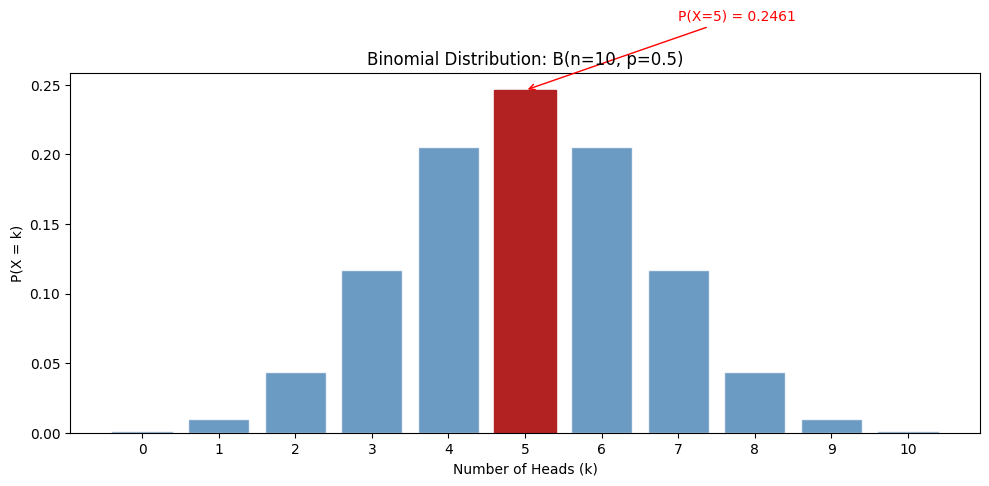

In [11]:
# plot the full PMF
k_values = np.arange(0, n+1)
pmf_values = binom.pmf(k_values, n, p)

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(k_values, pmf_values, color="steelblue", edgecolor="white", alpha=0.8)
# highlight k=5
bars[5].set_color("firebrick")
bars[5].set_alpha(1.0)

ax.set_xlabel("Number of Heads (k)")
ax.set_ylabel("P(X = k)")
ax.set_title(f"Binomial Distribution: B(n={n}, p={p})")
ax.set_xticks(k_values)

# annotate the k=5 bar
ax.annotate(f"P(X=5) = {p_exactly_5:.4f}", xy=(5, p_exactly_5),
            xytext=(7, p_exactly_5 + 0.05), fontsize=10,
            arrowprops=dict(arrowstyle="->", color="red"), color="red")

plt.tight_layout()
plt.show()

---
## Exercise 8: Correlation Coefficients

Calculate **Pearson** (linear) and **Spearman** (monotonic/rank-based) correlation between age and income.

In [12]:
import pandas as pd

data = pd.DataFrame({
    "age": [23, 25, 30, 35, 40],
    "income": [35000, 40000, 50000, 60000, 70000]
})
print("Dataset:")
print(data.to_string(index=False))

Dataset:
 age  income
  23   35000
  25   40000
  30   50000
  35   60000
  40   70000


In [13]:
# Pearson correlation (measures linear relationship)
pearson_r, pearson_p = stats.pearsonr(data["age"], data["income"])

# Spearman correlation (measures monotonic relationship, rank-based)
spearman_r, spearman_p = stats.spearmanr(data["age"], data["income"])

print(f"Pearson correlation:")
print(f"  r = {pearson_r:.4f},  p-value = {pearson_p:.4e}")
print(f"  => {'Strong' if abs(pearson_r) > 0.7 else 'Moderate' if abs(pearson_r) > 0.4 else 'Weak'} {'positive' if pearson_r > 0 else 'negative'} linear correlation")

print(f"\nSpearman correlation:")
print(f"  ρ = {spearman_r:.4f},  p-value = {spearman_p:.4e}")
print(f"  => {'Strong' if abs(spearman_r) > 0.7 else 'Moderate' if abs(spearman_r) > 0.4 else 'Weak'} {'positive' if spearman_r > 0 else 'negative'} monotonic correlation")

print(f"\nInterpretation:")
print(f"  Both coefficients are very close to 1.0, indicating a near-perfect")
print(f"  positive relationship: as age increases, income increases proportionally.")
print(f"  Pearson ≈ Spearman here because the relationship is both linear AND monotonic.")

Pearson correlation:
  r = 0.9997,  p-value = 6.5281e-06
  => Strong positive linear correlation

Spearman correlation:
  ρ = 1.0000,  p-value = 1.4043e-24
  => Strong positive monotonic correlation

Interpretation:
  Both coefficients are very close to 1.0, indicating a near-perfect
  positive relationship: as age increases, income increases proportionally.
  Pearson ≈ Spearman here because the relationship is both linear AND monotonic.


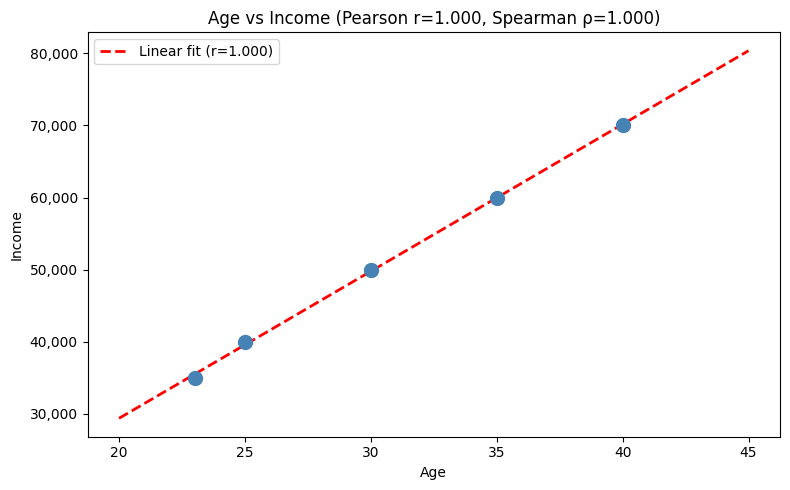

In [14]:
# scatter plot with regression line
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(data["age"], data["income"], color="steelblue", s=100, zorder=5)

# regression line
slope, intercept, _, _, _ = stats.linregress(data["age"], data["income"])
x_line = np.linspace(20, 45, 100)
ax.plot(x_line, slope * x_line + intercept, "r--", linewidth=2,
        label=f"Linear fit (r={pearson_r:.3f})")

ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_title(f"Age vs Income (Pearson r={pearson_r:.3f}, Spearman ρ={spearman_r:.3f})")
ax.legend()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.tight_layout()
plt.show()

---
*End of SciPy exercises.*